Importing Libraries

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Loading the dataset 

In [10]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Understanding the data 

In [11]:
df.shape

(7043, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Note: Most of the features are of onject type , even feature like TotalCharges are object which is supposed to be float . This is most likely due to whitespaces and there is no need of customerID for the further analysis and model building 

In [13]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges couldn't be converted
print("Missing values in TotalCharges:", df['TotalCharges'].isna().sum())
df = df.dropna(subset=['TotalCharges'])

# Reset index after drop
df.reset_index(drop=True, inplace=True)

Missing values in TotalCharges: 11


In [14]:
df.drop('customerID', axis=1, inplace=True)


In [15]:
#checking missing values
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(22)

In [18]:
df.drop_duplicates(inplace=True)



In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


Summary:
- TotalCharges=tenure*MonthlyCharges
- tenure ranges from 1 to 72 months
- MonthlyCharges range from $18.25 to $118.75
- On avg. typical customers has been with the company ~32 months, pays around $65/month, and has spent about $2,200 in total.

Checking the Target Variable:

 This section includes the checking of target variale which is Churn to see how the churn value distribution looks like.


In [20]:
df['Churn'].value_counts()


Churn
No     5153
Yes    1857
Name: count, dtype: int64

In [21]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.509272
Yes    26.490728
Name: count, dtype: float64

Univariate Analysis

Churn by gender 

In [22]:
df[['Churn', 'gender']].value_counts().unstack()

gender,Female,Male
Churn,,
No,2541,2612
Yes,934,923


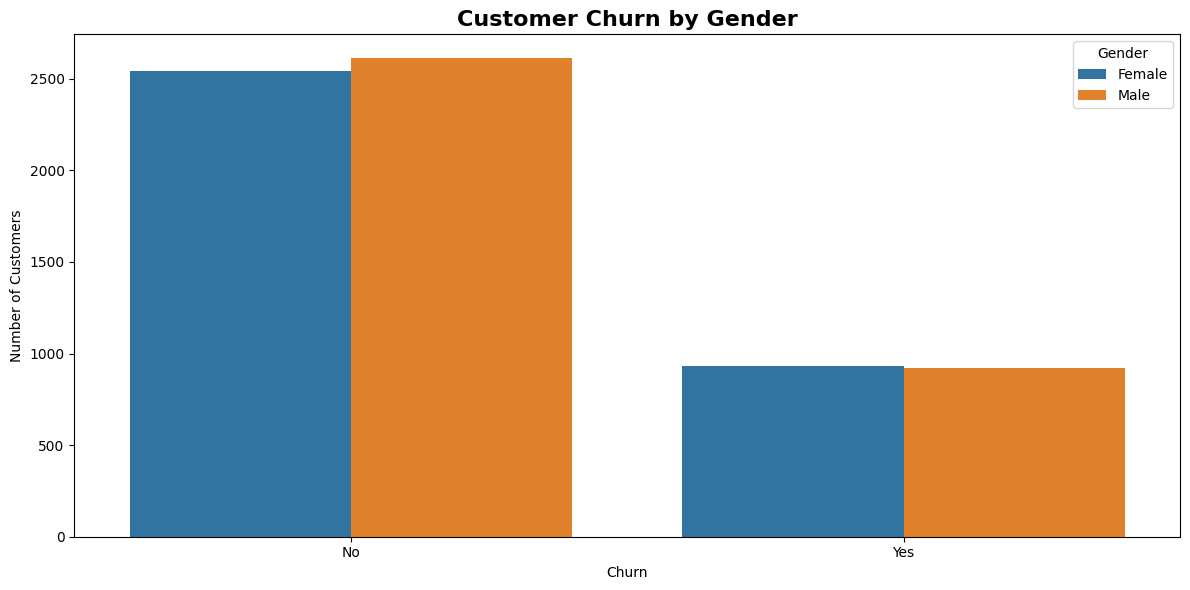

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Churn', hue='gender', data=df)
plt.title('Customer Churn by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Observation:
- Churn rate seems similar among the both gender
- So, gender alone isn't that strong feature for prediction 

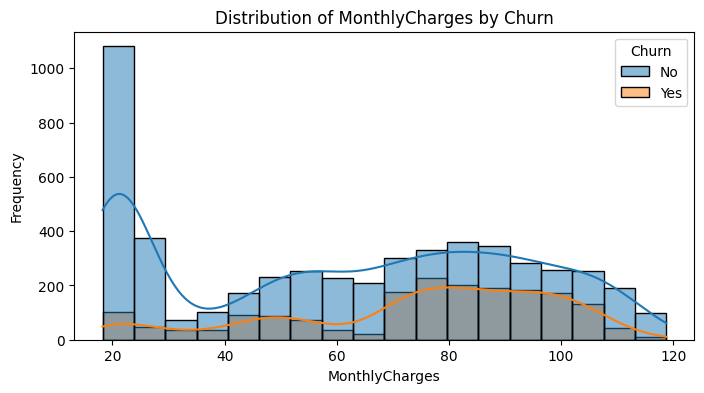

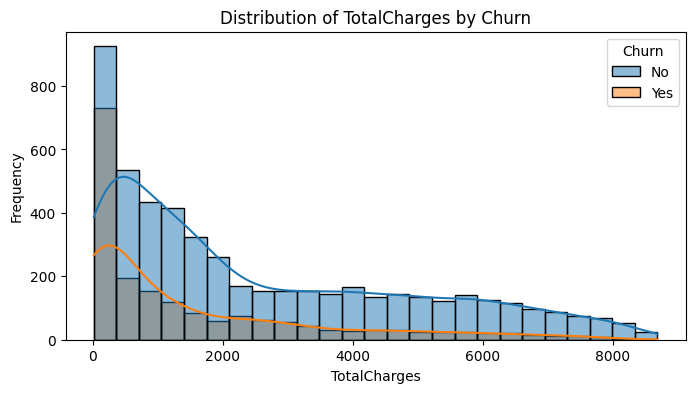

In [26]:
# Distribution of numerical features by churn
numerical_features = ['MonthlyCharges', 'TotalCharges']
for col in numerical_features:
  plt.figure(figsize=(8, 4))
  sns.histplot(data=df, x=col, hue='Churn', kde=True)
  plt.title(f'Distribution of {col} by Churn')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()